# Telechargement de mnist_dataset et classification

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0  # Normalize pixel values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
print("Training the model...")
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=20, alpha=1e-4,
                      solver='sgd', verbose=10, random_state=1,
                      learning_rate_init=0.1)

model.fit(X_train, y_train)

# Evaluate the model
print("Evaluating the model...")
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Save the model
print("Saving the model...")
joblib.dump(model, 'mnist_model.joblib')

print("Model training and saving completed.")

Loading MNIST dataset...
Training the model...
Iteration 1, loss = 0.30682385
Iteration 2, loss = 0.12595328
Iteration 3, loss = 0.08902409
Iteration 4, loss = 0.06938852
Iteration 5, loss = 0.05620847
Iteration 6, loss = 0.04785777
Iteration 7, loss = 0.03973063
Iteration 8, loss = 0.03356148
Iteration 9, loss = 0.02844355
Iteration 10, loss = 0.02503001
Iteration 11, loss = 0.02192181
Iteration 12, loss = 0.01788878
Iteration 13, loss = 0.01517539
Iteration 14, loss = 0.01304166
Iteration 15, loss = 0.01107030
Iteration 16, loss = 0.00936810
Iteration 17, loss = 0.00754326
Iteration 18, loss = 0.00661261
Iteration 19, loss = 0.00550325
Iteration 20, loss = 0.00493291
Evaluating the model...
Model accuracy: 0.9764
Saving the model...
Model training and saving completed.


/home/azar/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# Affichage d'un nombre aleatoire

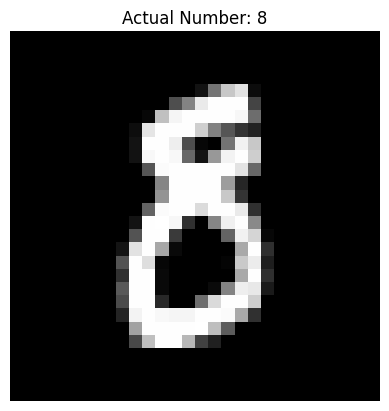

In [2]:
# Choose a random index
random_index = np.random.randint(0, X_test.shape[0])

# Reshape the image to 28x28
image = X_test[random_index].reshape(28, 28)

# Get the actual label
label = y_test[random_index]

# Plot the image with the label
plt.imshow(image, cmap='gray')
plt.title(f"Actual Number: {label}")
plt.axis('off')
plt.show()


# Matrice de confusion

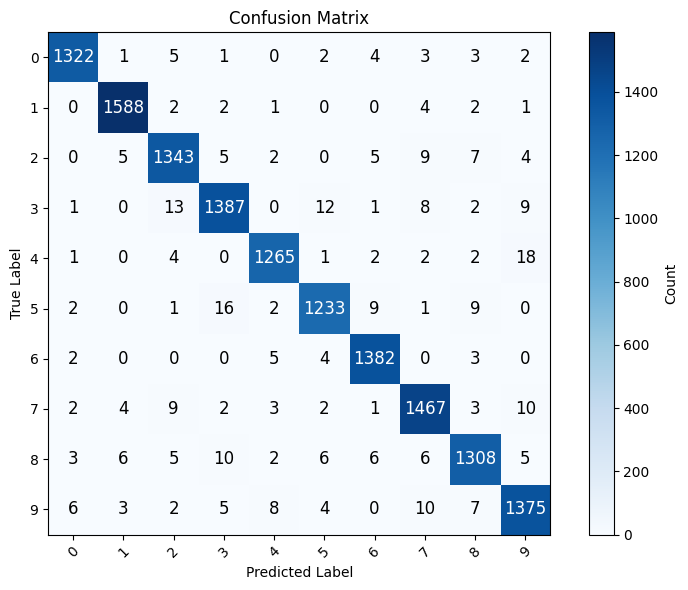

In [2]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Adjust colormap as desired
plt.colorbar(label='Count')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# Print labels on the confusion matrix
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt), ha='center', va='center',
                 fontsize=12, color="white" if cm[i, j] > thresh else "black")
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)
plt.tight_layout()
plt.show()